In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # Import SimpleImputer instead of Imputer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [ ]:
# Load the data
data = pd.read_csv("pima-indians-diabetes-database/diabetes.csv")

# Explore the data
print("Shape of the dataset:", data.shape)
print("First 5 rows of the dataset:\n", data.head())

Shape of the dataset: (768, 9)
First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Check for missing values
print("Any missing values present:", data.isnull().values.any())

Any missing values present: False


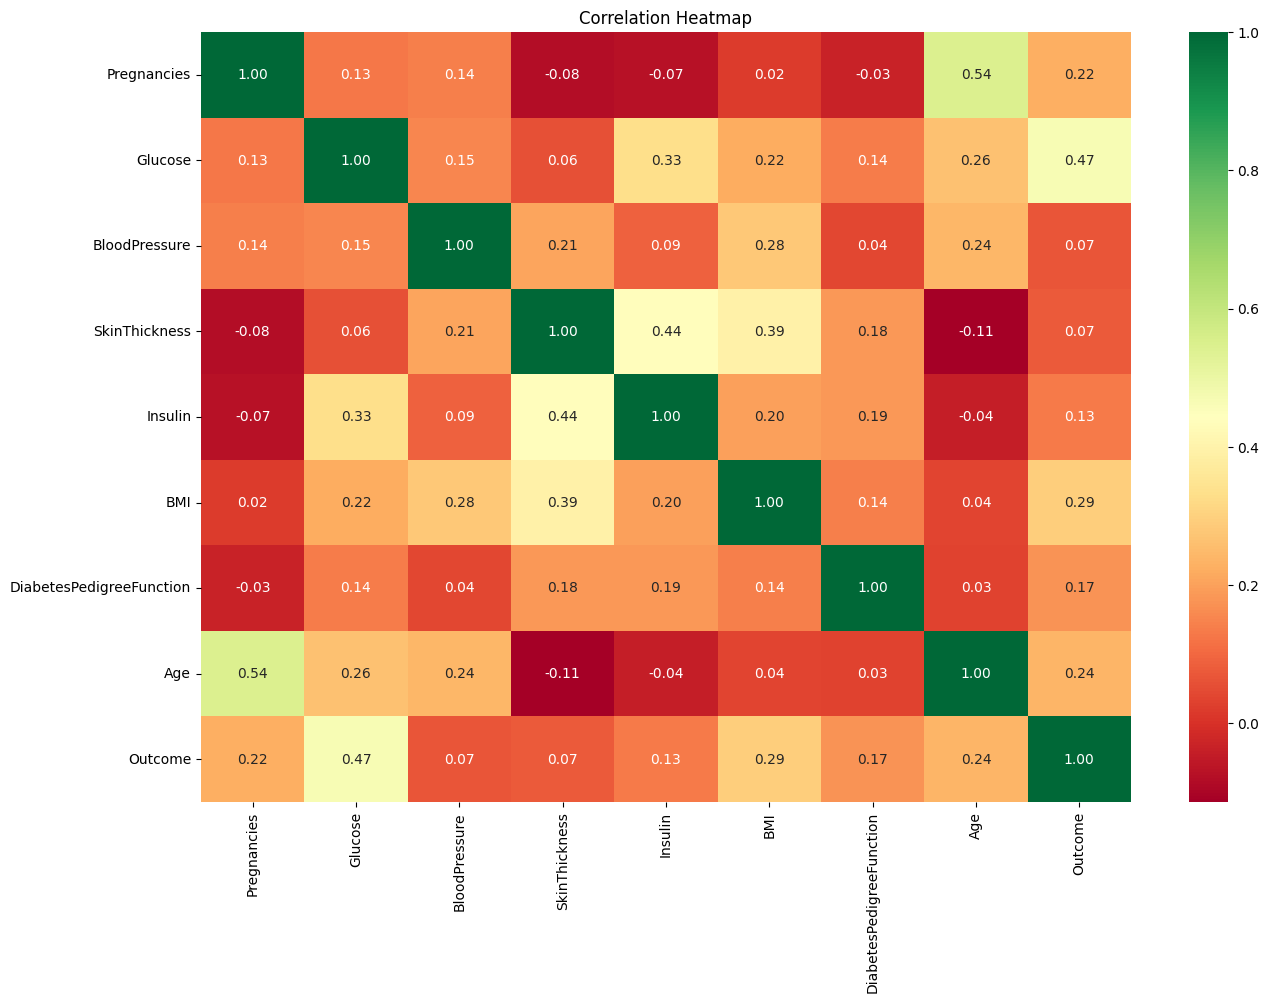

In [ ]:
# Visualize correlations
corrmat = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
print("Column names:", data.columns)

Column names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Change the diabetes column data from boolean to number
diabetes_map = {1: 1, 0: 0}  # Assuming 1 represents True and 0 represents False
data['Outcome'] = data['Outcome'].map(diabetes_map)

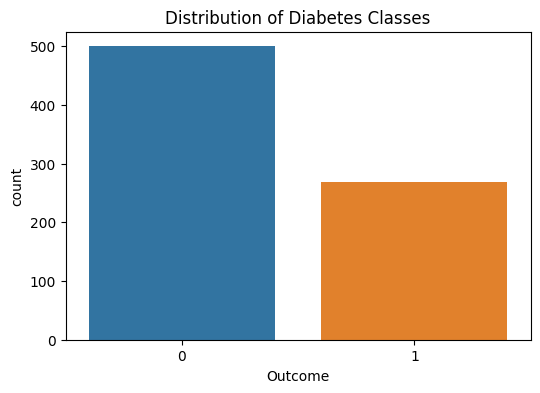

In [ ]:
# Visualize the distribution of diabetes classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title("Distribution of Diabetes Classes")
plt.show()


In [ ]:
# Train-Test Split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
predicted_class = ['Outcome']
X = data[feature_columns].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [ ]:
# Check and handle missing values
missing_columns = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
for column in missing_columns:
    print(f"Number of rows missing {column}: {len(data[data[column] == 0])}")


Number of rows missing Glucose: 5
Number of rows missing BloodPressure: 35
Number of rows missing Insulin: 374
Number of rows missing BMI: 11
Number of rows missing SkinThickness: 227


In [ ]:
fill_values = SimpleImputer(missing_values=0, strategy="mean")  # Use SimpleImputer
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

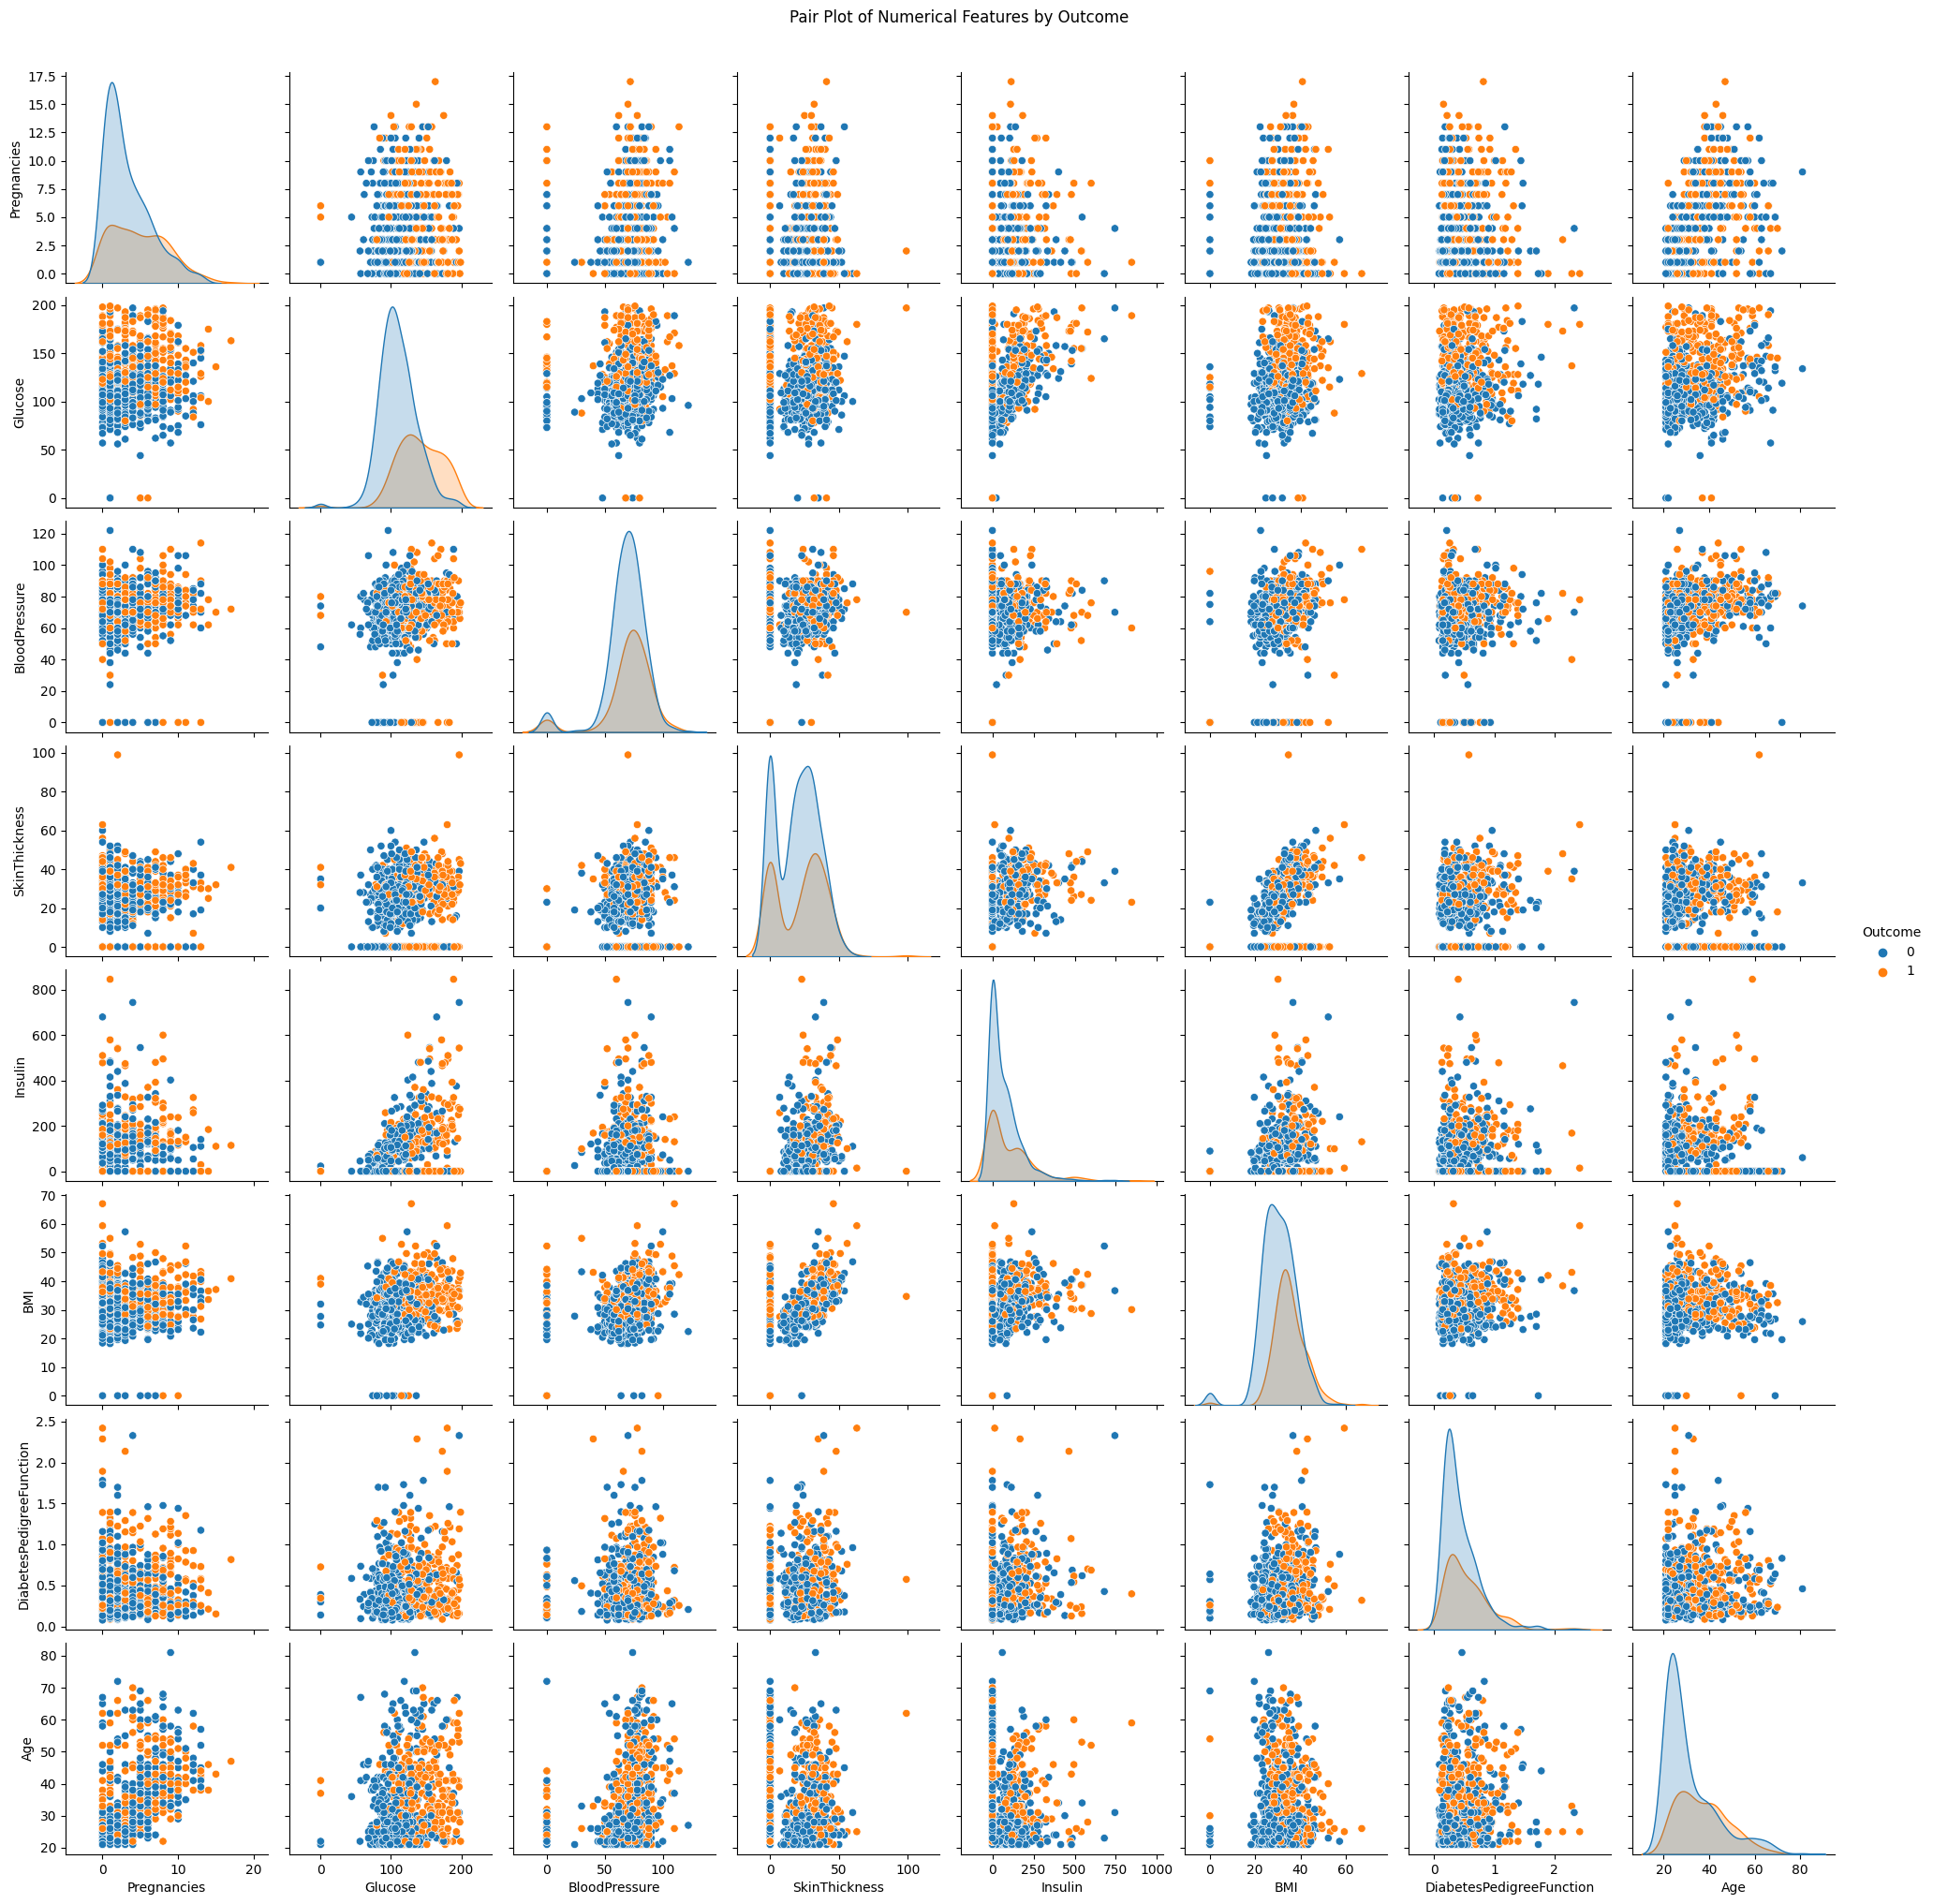

In [ ]:
# Pair plot for numerical features
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Outcome', y=1.02)
plt.show()

In [ ]:
# Apply Algorithm - RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())
predict_train_data = random_forest_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, predict_train_data)
print("Random Forest Model Accuracy: {:.3f}".format(accuracy))

Random Forest Model Accuracy: 0.736


In [ ]:
# Hyperparameter optimization using RandomizedSearchCV for XGBoost
params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,
                                   scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
start_time = datetime.now()
random_search.fit(X, y.ravel())
print('\nTime taken:', datetime.now() - start_time)

# Best hyperparameters for XGBoost
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Time taken: 0:00:03.672464


In [ ]:
# Cross-validation score for XGBoost
cross_val_scores = cross_val_score(best_xgb_model, X, y.ravel(), cv=10)
print("XGBoost Cross-Validation Scores:\n", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

XGBoost Cross-Validation Scores:
 [0.72727273 0.75324675 0.77922078 0.72727273 0.72727273 0.74025974
 0.76623377 0.83116883 0.73684211 0.78947368]
Mean Cross-Validation Score: 0.7578263841421736
